In [151]:
#%%
# Preprocessing Signals

import pandas as pd
import heartpy as hp
import neurokit2 as nk
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import datetime as datetime
import os

Each of the ten samples given has been saved to one Excel Workbook (see load_files.py).

## Explore Data File:
I will start by visualising the Red, Blue, and Green channels so that I can observe the amount of noise before filtering. 

In [152]:
os.chdir('/home/jazzy/Documents/PPS-Project')
ppg_db_1 = pd.read_excel('full_raw_ppg_data.xlsx', sheet_name = 'ppg_db_1')




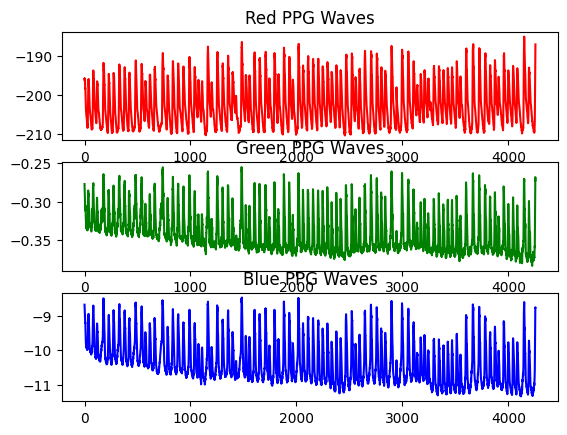

In [153]:

fig, ax = plt.subplots(3)

ax[0].plot(ppg_db_1['Red'].values, color = 'red')
ax[0].set_title('Red PPG Waves')

ax[1].plot(ppg_db_1['Green'].values, color = 'green')
ax[1].set_title('Green PPG Waves')

ax[2].plot(ppg_db_1['Blue'].values, color = 'blue')
ax[2].set_title('Blue PPG Waves')

plt.show()

Next, I'll look at a segment to have a closeer look

59.77856394023816


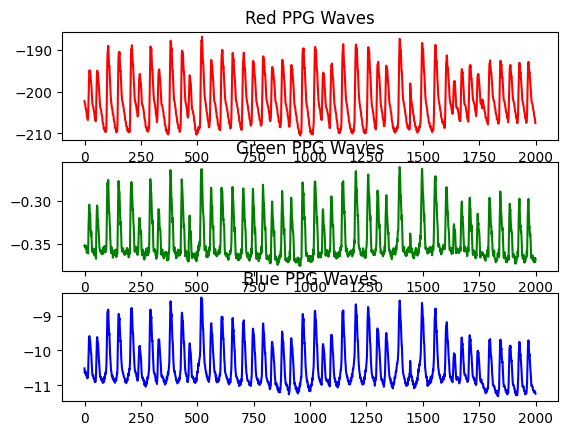

In [154]:
fig, ax = plt.subplots(3)

ax[0].plot(ppg_db_1['Red'].values[1500:3500], color = 'red')
ax[0].set_title('Red PPG Waves')

ax[1].plot(ppg_db_1['Green'].values[1500:3500], color = 'green')
ax[1].set_title('Green PPG Waves')

ax[2].plot(ppg_db_1['Blue'].values[1500:3500], color = 'blue')
ax[2].set_title('Blue PPG Waves')

print(max(ppg_db_1['time']))
plt.show()

To calculate the sampling rate(number of samples per millisecond). To convert seconds to milliseconds we need to do sec * 1000. 

In [155]:

ppg_db_1['time2'] = ppg_db_1['time'] * 1000
print(ppg_db_1['time'].dtype)
print(ppg_db_1['time2'].values[0:20], len(ppg_db_1['time2'].values))



float64
[  0.          13.29890188  26.59780376  39.89670563  53.19560751
  66.49450939  79.79341127  93.09231314 106.39121502 119.6901169
 132.98901878 146.28792065 159.58682253 172.88572441 186.18462629
 199.48352817 212.78243004 226.08133192 239.3802338  252.67913568] 4256


In [156]:
os.chdir('/home/jazzy/Documents/PPS-Project/Raw_PPG_Files')
Red1 = ppg_db_1['Red'].values
Green1 = ppg_db_1['Green'].values
Blue1 = ppg_db_1['Blue'].values
timer = ppg_db_1['time2'].values

sample_rate = hp.get_samplerate_mstimer(timer)
print(sample_rate)






71.19608969286732


/home/jazzy/.local/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

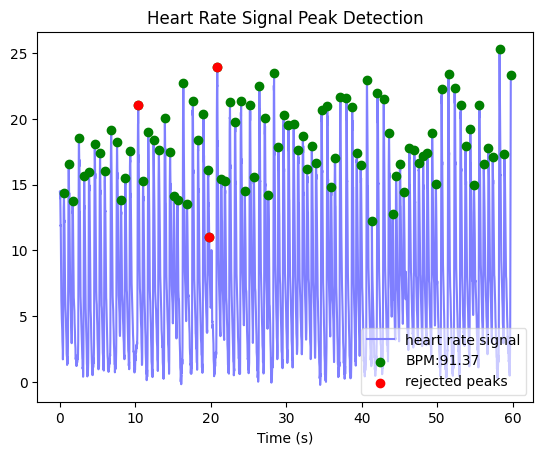

bpm: 91.368912
ibi: 656.678497
sdnn: 112.878992
sdsd: 92.707981
rmssd: 155.797683
pnn20: 0.890244
pnn50: 0.768293
hr_mad: 84.274291
sd1: 110.136231
sd2: 116.147789
s: 40187.503883
sd1/sd2: 0.948242
breathingrate: 0.233333


In [157]:
wd, m  = hp.process(Red1, sample_rate = sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd,m)

plt.show()
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

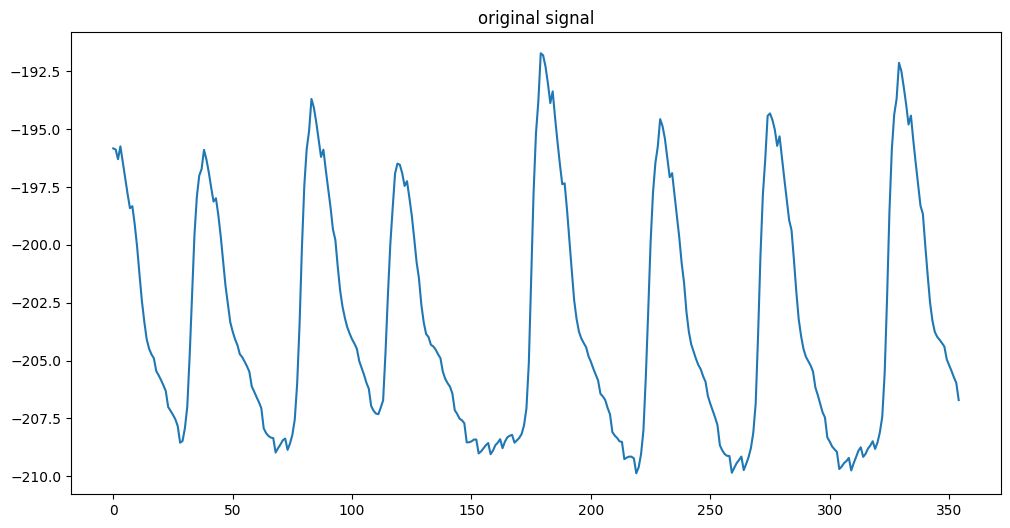

In [163]:
plt.figure(figsize=(12,6))
plt.plot(Red1[0:int(5* sample_rate)])
plt.title('original signal')
plt.show()

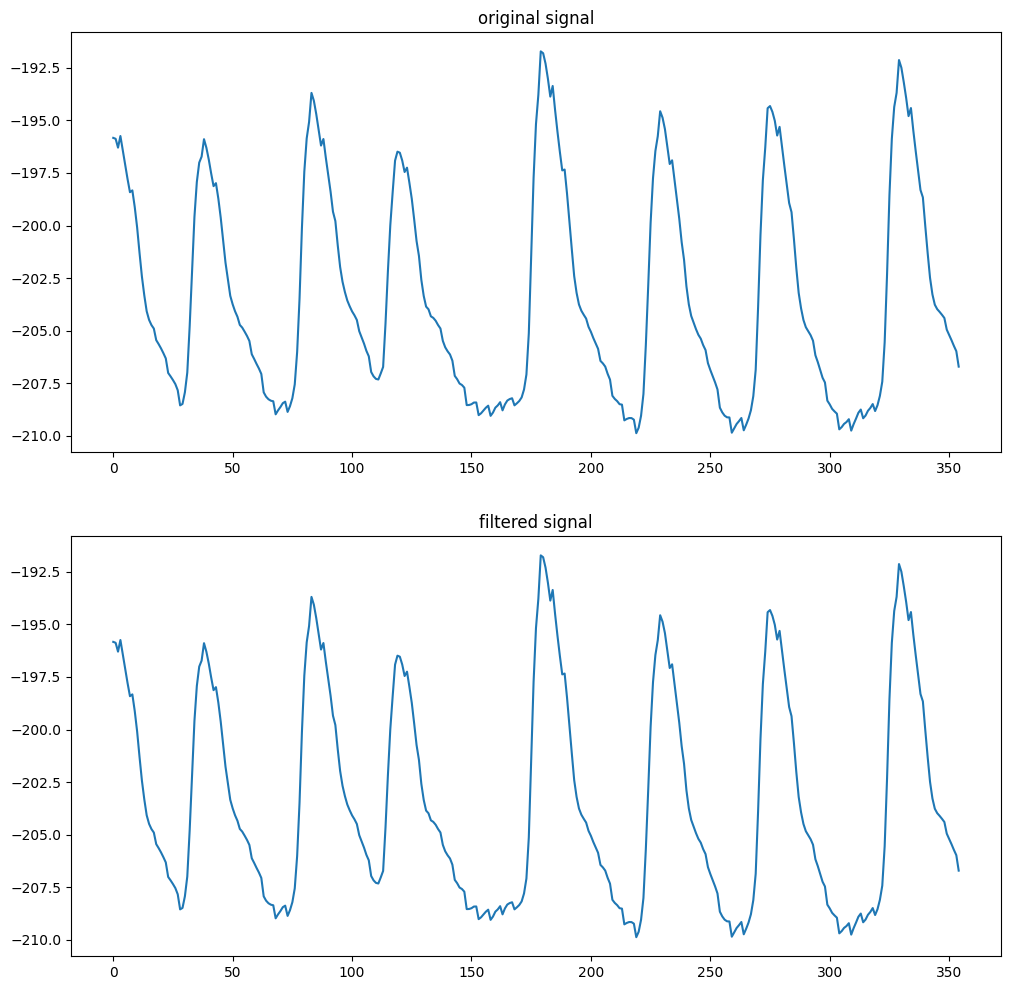

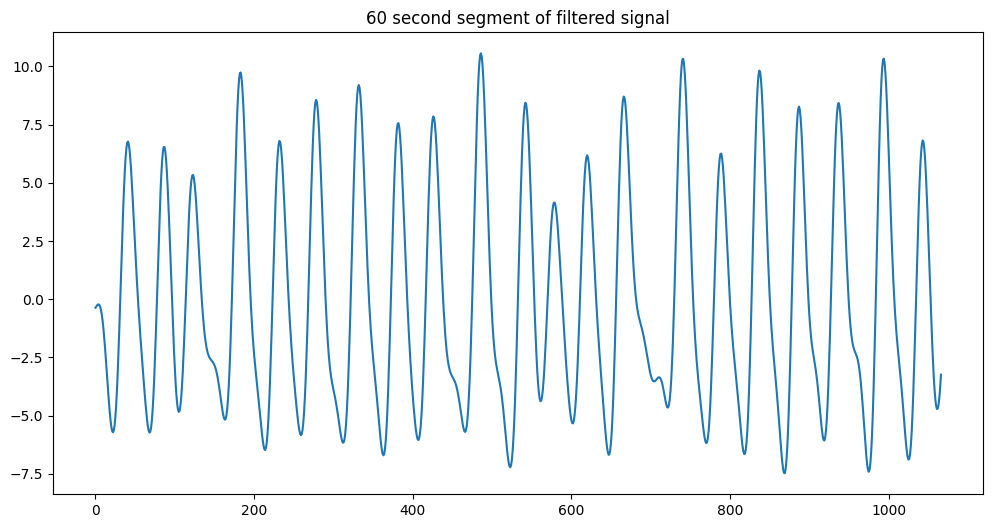

In [166]:
filtered = hp.filter_signal(Red1, [0.7, 3.0], sample_rate=sample_rate, 
                            order=3, filtertype='bandpass')

#let's plot first 240 seconds and work with that!
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(Red1[0:int(5 * sample_rate)])
plt.title('original signal')
plt.subplot(212)
plt.plot(Red1[0:int(5 * sample_rate)])
plt.title('filtered signal')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(filtered[0:int(sample_rate * 15)])
plt.title('60 second segment of filtered signal')
plt.show()